# Implementing a Linear Regression problem with Python

Now, we are ready to implement our own linear regression example. 

In linear regression, our hypothesis function $h_\theta$ is:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And, as we are doing regression, our cost function is: 

$$J(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2 $$

Nota that, the cost funtion is just the sum of all the square errors from our hypothesis ($\hat{y}_i$) versus the data ($y_i$).

The best parameters for our hypothesis will give us the **minimum cost function**.

## Finding a minimum for J

Finding a minimum of a function is equivalent to finding the parameters that make the gradient of that function to vanish. In other words:

$$\nabla_{\theta} J(\theta) = 0$$

We will implement two ways of solving this problem.

### A) Gradient descent (Numerical method)


From a starting point ($\theta$), we will try to move to a new point $\theta '$, decreasing the cost funtion ($J(\theta)$). We will do this many times, up to we find a minimum (or close enough to it).

#### Partial differentials of the cost function (using chain rule)

$$\frac{\partial J}{\partial\theta_0} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$

$$\frac{\partial J}{\partial\theta_1} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$

Finally, we need to update iteratively the values for $\theta_0$ and $\theta_1$. Using Gradient Descent algorithm  with learning rate ($\alpha$) until convergence criterion ($\epsilon$) is achieved:

         while (convergence==False):
$$\theta_0' = \theta_0 - \alpha \frac{\partial J}{\partial\theta_0} $$
$$\theta_1' = \theta_1 - \alpha \frac{\partial J}{\partial\theta_1} $$
$$J' = J(\theta_0',\theta_1')$$
$$\Delta J = abs(J'-J)$$
$$ convergence = (\Delta J < \epsilon)$$

### B) Normal equations (Algebra)

In matrix notation, we can implement our hypothesis as:

$$h_\theta (x^{(i)})=(x^{(i)})^T \theta$$

Note that, in this case, if we want to consider our hypothesis such $h(\theta) = \theta_0 + \theta_i x^{(i)}$ where $x$ is a vector, for consistency, we need to introduce an additional "constant feature" in our data. In other words, we need to map our input data as follows:

$$x_i \rightarrow [1,x_i]$$

we can express gradient of J as follows:

$$\nabla_{\theta} J(\theta) = X^T X \theta - X^T \vec{y}$$

To minimize J, we set its derivatives to zero, therefore obtaining the **normal equations**:

$$ X^T X \theta = X^T \vec{y}$$

We can solve this equation for theta.

As a final remark, we can extend this method to non linear hypothesis by extending our input data $x$ to the features we need. For example, for a parabolic fit:

$$x_i \rightarrow [1,x_i,x_i^2]$$

## Problem

Giving the data provided below (x->y), find the best equation fit, using:

* Gradient Descent
* Normal Equations

Using your own python implementation, using numpy and scipy tools (**not scipy!**).

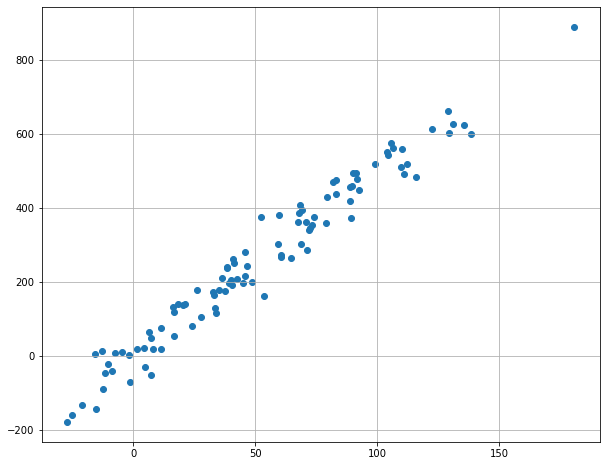

In [1]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


theta_0 = 2
theta_1 = 5

X = (np.random.randn(100) + 1) * 50
jitter = 50 * np.random.randn(100)
y = theta_0 + theta_1 * X + jitter

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(X, y)
ax.grid(True)

### Plotting our first approach

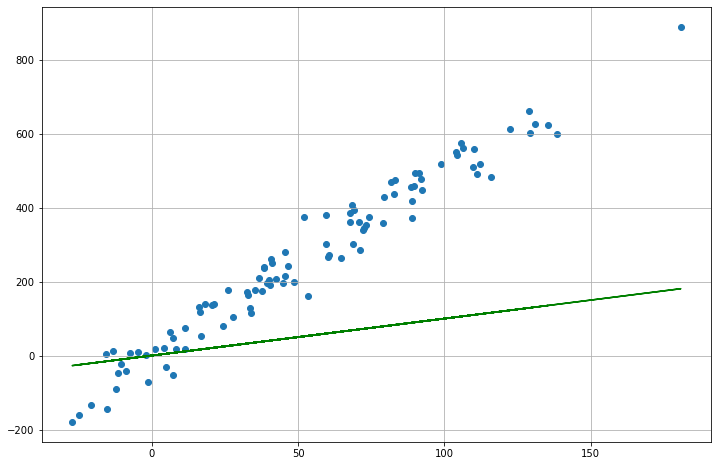

In [2]:
fig, ax = plt.subplots(figsize=(12,8))
theta_0=0;
theta_1=1;
y_hat = theta_1*X+theta_0
ax.plot(X,y_hat,'g-')
ax.scatter(X, y)
ax.grid(True)

## (1) Gradient Descent
### 1.1 Defining cost function

In [3]:
def cost_function(X, y):
    return lambda thetas: sum((thetas[0] + thetas[1] * X - y) ** 2) / len(X)

## example:

In [4]:
theta_0 = 2
theta_1 = 5
J = cost_function(X, y)
J([theta_0,theta_1])

1926.4304706036962

In [5]:
from scipy.optimize import fmin

fmin(J, [0,0])

Optimization terminated successfully.
         Current function value: 1897.337791
         Iterations: 96
         Function evaluations: 185


array([5.3977565 , 4.89015389])

### 1.2 Defining derivatives

In [6]:
def derivative_theta_0(X, y):
    return lambda theta_0, theta_1: 2*sum(theta_0 + theta_1 * X - y) / len(X)

def derivative_theta_1(X, y):
    return lambda theta_0, theta_1: 2*sum((theta_0 + theta_1 * X - y) * X) / len(X)

In [7]:
J_prime_0 = derivative_theta_0(X, y)
J_prime_1 = derivative_theta_1(X, y)

### 1.3 Implementing iterative algorithm

In [8]:
theta_0 = np.random.randn()
theta_1 = np.random.randn()
J_prime_0 = derivative_theta_0(X, y)
J_prime_1 = derivative_theta_1(X, y)
convergence_criterion = 0.01
converged = False
alpha = 10e-5
trace = []
n_iter_max = 10000
theta_0 = 0
theta_1 = 1
for i in range(n_iter_max):
    trace.append([theta_0, theta_1])
    
    J_0 = J([theta_0, theta_1])

    diff_theta_0 = J_prime_0(theta_0, theta_1)
    diff_theta_1 = J_prime_1(theta_0, theta_1)
    
    theta_0 = theta_0 - alpha * diff_theta_0
    theta_1 = theta_1 - alpha * diff_theta_1
    
    J_1 = J([theta_0, theta_1])
    
    
    
    converged = abs(J_0 - J_1) < convergence_criterion
    if converged == True:
        print("we found the best parameters at iteration %d"%i)
        print(theta_0,theta_1)
        print("cost funtions is %f"%J_1)
        break

we found the best parameters at iteration 3
0.04582500777107981 4.94976323874709
cost funtions is 1909.298297


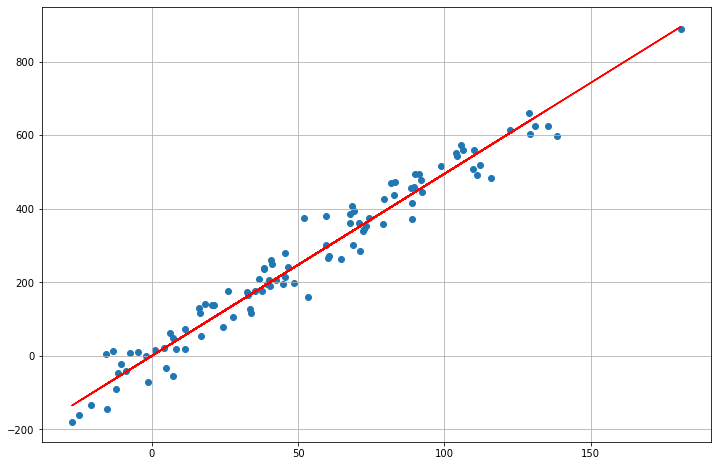

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X, y)
ax.plot(X,theta_0+theta_1*X,'r-')
ax.grid(True)

## (2) Normal Equations

In this case, we need to transform a bit our data in order to be able to work with $\theta$ as a vector.

In [10]:
def create_poly(k, x):
    n_examples = len(x)
    phi = np.ones((n_examples,k+1))
    for j in range(k+1):
        poli = x**j
        phi[:,j]=poli.ravel()
    return phi

In [11]:
X1 = create_poly(1,X)
a = np.dot(X1.T,X1)
b = np.dot(X1.T,y)

In [12]:
print(a,b)

[[1.00000000e+02 5.22448460e+03]
 [5.22448460e+03 4.68637853e+05]] [  26088.31179127 2319911.78318419]


In [13]:
normal = np.linalg.solve(a,b)

In [14]:
normal

array([5.3977981 , 4.89015357])

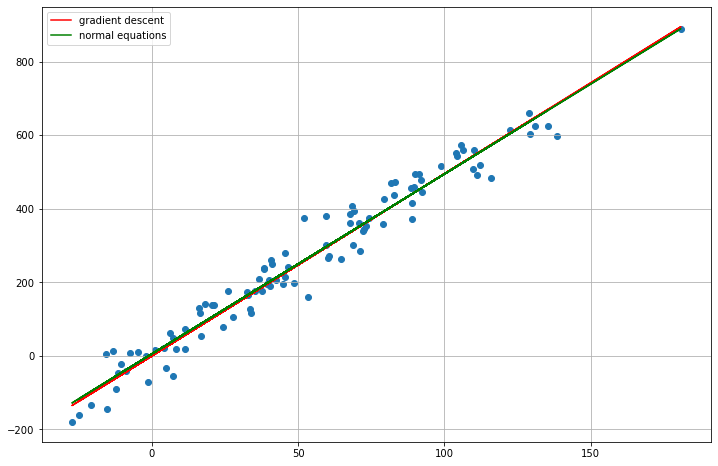

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X, y)
ax.plot(X,theta_0+theta_1*X,'r-',label="gradient descent")
ax.plot(X,np.dot(X1,normal.T),'g-',label="normal equations")
ax.legend()
ax.grid(True)

## More complex data

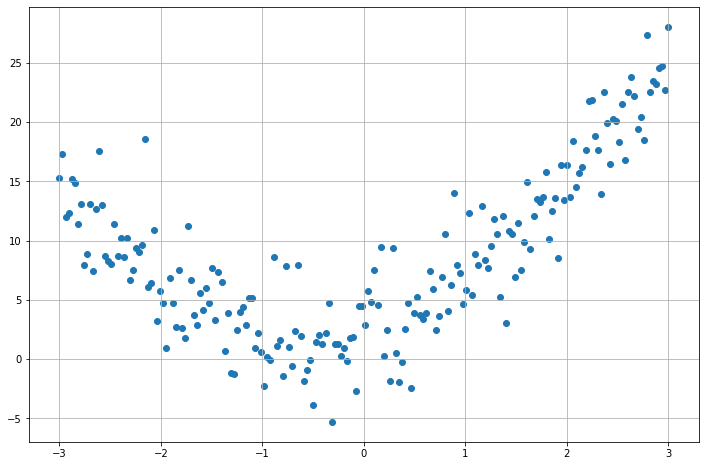

In [16]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


theta_0 = 2
theta_1 = 2
theta2=2
npoints=200
X = np.linspace(-3,3,npoints)
jitter = 3* np.random.randn(npoints)
y = theta_0 + theta_1 * X+ theta2*X**2 + jitter

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X, y)
ax.grid(True)

In [17]:
X1 = create_poly(2,X)
a = np.dot(X1.T,X1)
b = np.dot(X1.T,y)

In [18]:
normal = np.linalg.solve(a,b)

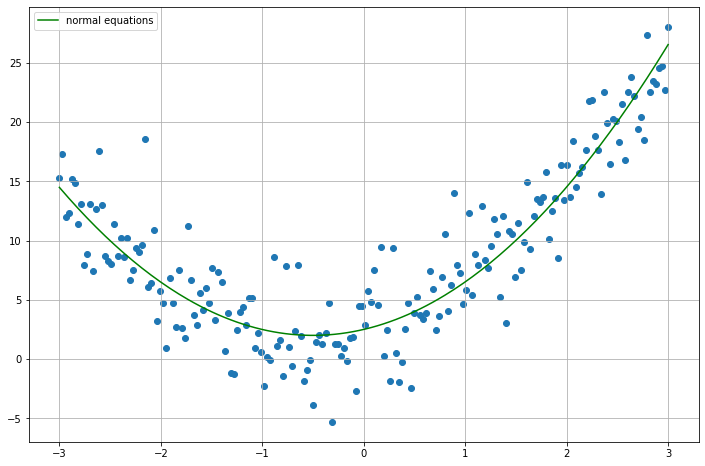

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X, y)
ax.plot(X,np.dot(X1,normal.T),'g-',label="normal equations")
ax.legend()
ax.grid(True)